In [226]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import pandas as pd
import numpy as np
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
import pandas as pd
from torch.autograd import Variable
import numpy as np
import torch.functional as F
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
from   sklearn.decomposition import PCA
from   sklearn import linear_model
import matplotlib.pyplot as plt                   # постороение графиков
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset

In [227]:
# Читаем файл с компетенциями
df = pd.read_excel('/content/Dataset_L_4_25_diff_4_COLAB.xlsx')

In [228]:
df['SKILLS'] = df['SKILLS'].astype(str)

# Длинна каждого посчитаем длинну
df['list_of_skill'] = df['SKILLS'].apply(lambda x: x.split(','))

In [229]:
df['cnt_skill'] = df['list_of_skill'].apply(lambda x: len(x))

In [230]:
df.head(5)

,SKILLS,list_of_skill,cnt_skill
0,"1С ПРЕДПРИЯТИЕ 8,ФИНАНСОВАЯ ОТЧЕТНОСТЬ,УЧЕТ ОС...","[1С ПРЕДПРИЯТИЕ 8, ФИНАНСОВАЯ ОТЧЕТНОСТЬ, УЧЕТ...",25
1,"1С ТОРГОВЛЯ,КЛИЕНТООРИЕНТИРОВАННОСТЬ,1С УПРАВЛ...","[1С ТОРГОВЛЯ, КЛИЕНТООРИЕНТИРОВАННОСТЬ, 1С УПР...",25
2,"1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ,1С БИТРИКС,CRM,B2B ПРО...","[1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ, 1С БИТРИКС, CRM, B2B...",25
3,"3D ГРАФИКА,ГРАФИЧЕСКИЙ ДИЗАЙН,ADOBE INDESIGN,В...","[3D ГРАФИКА, ГРАФИЧЕСКИЙ ДИЗАЙН, ADOBE INDESIG...",25
4,"ADOBE PHOTOSHOP,ФОТОГРАФИЯ,ДИЗАЙН,ОБРАБОТКА ИЗ...","[ADOBE PHOTOSHOP, ФОТОГРАФИЯ, ДИЗАЙН, ОБРАБОТК...",25


In [231]:
df_skill = df[(df.cnt_skill > 11) & (df.cnt_skill < 20)]

In [232]:
data = df_skill

In [233]:
len(data)

34569

In [234]:
# Создаем словарь
vocabulary = []
vocabulary.append('[PAD]')
vocabulary.append('[MASK]')
for i, row  in data.iterrows():
    for j in data["list_of_skill"][i]:
        if j not in vocabulary:
            vocabulary.append(j)
word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}
vocabulary_size = len(vocabulary)

In [235]:
vocabulary_size

17751

In [236]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Выведем результат
print(word_counts)

Counter({'РАБОТА В КОМАНДЕ': 12276, 'ГРАМОТНАЯ РЕЧЬ': 11861, 'ПОЛЬЗОВАТЕЛЬ ПК': 8318, 'ДЕЛОВОЕ ОБЩЕНИЕ': 6882, 'ВЕДЕНИЕ ПЕРЕГОВОРОВ': 6539, 'ТЕЛЕФОННЫЕ ПЕРЕГОВОРЫ': 6271, 'АКТИВНЫЕ ПРОДАЖИ': 6125, 'ДЕЛОВАЯ ПЕРЕПИСКА': 5616, 'НАВЫКИ ПРОДАЖ': 5063, 'ОРГАНИЗАТОРСКИЕ НАВЫКИ': 4475, 'ПОИСК И ПРИВЛЕЧЕНИЕ КЛИЕНТОВ': 4249, 'ОРИЕНТАЦИЯ НА РЕЗУЛЬТАТ': 3963, 'ГРАМОТНОСТЬ': 3916, 'РАБОТА С БОЛЬШИМ ОБЪЕМОМ ИНФОРМАЦИИ': 3896, 'ДЕЛОВАЯ КОММУНИКАЦИЯ': 3644, 'ЗАКЛЮЧЕНИЕ ДОГОВОРОВ': 3638, 'УМЕНИЕ РАБОТАТЬ В КОМАНДЕ': 3314, 'РАБОТА В УСЛОВИЯХ МНОГОЗАДАЧНОСТИ': 3125, 'ПРЯМЫЕ ПРОДАЖИ': 2919, 'КЛИЕНТООРИЕНТИРОВАННОСТЬ': 2866, 'РАЗВИТИЕ ПРОДАЖ': 2668, 'УПРАВЛЕНИЕ ПЕРСОНАЛОМ': 2612, 'B2B ПРОДАЖИ': 2593, 'АНГЛИЙСКИЙ ЯЗЫК': 2574, 'ОТВЕТСТВЕННОСТЬ': 2357, 'ОБУЧЕНИЕ И РАЗВИТИЕ': 2353, 'КОММУНИКАБЕЛЬНОСТЬ': 2325, 'ХОЛОДНЫЕ ПРОДАЖИ': 2309, 'ПРОВЕДЕНИЕ ПРЕЗЕНТАЦИЙ': 2131, 'МНОГОЗАДАЧНОСТЬ': 2122, 'CRM': 2022, 'ОБУЧЕНИЕ ПЕРСОНАЛА': 2018, 'УПРАВЛЕНИЕ ПРОДАЖАМИ': 2009, '1С ПРЕДПРИЯТИЕ 8': 2002, 'УПРАВЛЕНИЕ ПРОЕКТАМИ': 

In [237]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Получим список слов, которые встречаются всего один раз
unique_words = [word for word, count in word_counts.items() if count == 1]

# Выведем результат
print(unique_words)

['RPC API', 'HELM CHARTS', 'AZURE SERVICE BUS', 'GOOGLE STUDIO', 'EXCEL ВПР', 'GOOGL SUITE', 'БУХГАЛТЕР ПО РАСЧЕТУ ЗАРАБОТНОЙ ПЛАТЫ', 'ТЕХНИЧЕСКАЯ ПОДДЕРЖКА 1С', 'КОНСУЛЬТАЦИЯ ПОЛЬЗОВАТЕЛЕЙ', 'УЧЕТ ГОТОВОЙ ПРОДУКЦИИ', 'УЧЕТ ПРОИЗВОДСТВА', 'ОСНОВНОЕ ПРОИЗВОДСТВО', 'ОБЩЕПРОИЗВОДСТВЕННЫЕ РАСХОДЫ', 'LIGHTMASS', '2D ГРАФИКА', 'РЕКЛАМНЫЕ КРЕАТИВЫ', 'MARKETING CREATIVES', 'ВЛАДЕНИЕ ДЕЛОВЫМ ЭТИКЕТОМ', 'GOOGL ТАБЛИЦЫ', 'CAPTURE ONE PRO', 'ENGLISH INTERMEDIATE', 'WHITE BOX TESTING', 'FULLY REMOTE JOB', 'ПОНИМАНИЕ ПРОЦЕССА РАЗРАБОТКИ', 'ТЕСТИРОВАНИЕ ВЕБ ПРИЛОЖЕНИЙ', 'JAVA 11 SDK', 'RDBMS SQL', 'CALLBACKS', 'PROMISE', 'OBSERVABLES', 'BOOTSTRAP 4', 'ДИЗАЙНЕР ИНТЕРЬЕРОВ', 'РЕМОНТЫ', 'СТРОИТЕЛЬНАЯ ОРГАНИЗАЦИЯ', 'УГОЛЬ', 'РУДА', 'УСТОЙЧИВОСТЬ', 'ГЕОМЕХАНИКА', 'УПРАВЛЕНИЕ СОСТОЯНИЕМ МАССИВА', 'СМЕТНЫЕ ПРОГРАММЫ', 'СИСТЕМНОЕ ИНТЕГРИРОВАНИЕ', 'СИСТЕМА ЗВУКОУСИЛЕНИЯ', 'АВ', 'ТЕАТРАЛЬНАЯ ТЕХНОЛОГИЯ', 'РАЗВЛЕКАТЕЛЬНЫЙ КОНТЕНТ', 'ТОПОГРАФ', 'НВФ', 'СПК', 'СВЕТО ПРОЗРАЧНЫЕ КОНСТРУКЦИИ', 'ПРОЕКТИРОВАНИЕ НПБ', 

In [238]:
len(unique_words)

10937

In [239]:
## Преобразуйте объект Counter в DataFrame
#word_count_df = pd.DataFrame(list(word_counts.items()), columns=['Skill', 'Count'])

In [240]:
#word_count_df.to_excel('word_count_df.xlsx')

In [241]:
# Случайная сортировка списков
for index, row in data.iterrows():
    random.shuffle(row['list_of_skill'])

In [242]:
len_tokens = 25

In [243]:
data['list_of_skill'] = data['list_of_skill'].apply(lambda x: x + ['[PAD]' for _ in range(len_tokens - len(x))])

<ipython-input-243-653f8f11be4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['list_of_skill'] = data['list_of_skill'].apply(lambda x: x + ['[PAD]' for _ in range(len_tokens - len(x))])


In [244]:
data['target']= data['list_of_skill'].apply(lambda x: x[0])

<ipython-input-244-213780b1f4fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']= data['list_of_skill'].apply(lambda x: x[0])


In [245]:
data['seq'] = data['list_of_skill'].apply(lambda x: ['[MASK]'] + x[1:] if len(x) > 0 else [])

<ipython-input-245-725515475f96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seq'] = data['list_of_skill'].apply(lambda x: ['[MASK]'] + x[1:] if len(x) > 0 else [])


In [246]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq
4230,"NET CORE,DDD,CI,VKONTAKTE API,OFFICE,RPC API,R...","[HELM CHARTS, DRY, DDD, KUBERNETES, RPC API, C...",19,HELM CHARTS,"[[MASK], DRY, DDD, KUBERNETES, RPC API, CI, BD..."
4231,"1C БУХГАЛТЕРИЯ,ЭКОНОМИЧЕСКИЙ АНАЛИЗ,КРЕДИТОРСК...","[ФИНАНСОВЫЙ МЕНЕДЖМЕНТ, ФОРМИРОВАНИЕ БЮДЖЕТА, ...",19,ФИНАНСОВЫЙ МЕНЕДЖМЕНТ,"[[MASK], ФОРМИРОВАНИЕ БЮДЖЕТА, ФИНАНСОВЫЙ АНАЛ..."
4232,"1C ФИНАНСЫ,АНАЛИЗ ТЕКУЩИХ ФИНАНСОВЫХ ПОКАЗАТЕЛ...","[УМЕНИЕ РАБОТАТЬ В КОЛЛЕКТИВЕ, УМЕНИЕ СЛУШАТЬ,...",19,УМЕНИЕ РАБОТАТЬ В КОЛЛЕКТИВЕ,"[[MASK], УМЕНИЕ СЛУШАТЬ, АНАЛИТИЧЕСКИЕ НАВЫКИ,..."
4233,"1С БИТРИКС,MS POWERPOINT,УПРАВЛЕНИЕ ПРОЕКТАМИ,...","[УПРАВЛЕНИЕ ПРОЕКТАМИ, УДАЛЕННАЯ РАБОТА, РАБОТ...",19,УПРАВЛЕНИЕ ПРОЕКТАМИ,"[[MASK], УДАЛЕННАЯ РАБОТА, РАБОТА С БОЛЬШИМ ОБ..."
4234,"1С БИТРИКС,АНАЛИЗ ДАННЫХ,GOOGLE STUDIO,MS EXCE...","[GOOGLE STUDIO, МАРКЕТИНГОВЫЙ АНАЛИЗ, EXCEL ВП...",19,GOOGLE STUDIO,"[[MASK], МАРКЕТИНГОВЫЙ АНАЛИЗ, EXCEL ВПР, МАКР..."
...,...,...,...,...,...
38794,"ЯНДЕКС ДИРЕКТ,ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,...","[ЯНДЕКС ДИРЕКТ, РСЯ, ЯНДЕКС МЕТРИКА, АВТОМАТИЗ...",12,ЯНДЕКС ДИРЕКТ,"[[MASK], РСЯ, ЯНДЕКС МЕТРИКА, АВТОМАТИЗАЦИЯ КО..."
38795,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,WEB АНАЛИТИКА,...","[FIREBASE, APPSFLYER, GOOGLE ANALYTICS, MS SQL...",12,FIREBASE,"[[MASK], APPSFLYER, GOOGLE ANALYTICS, MS SQL, ..."
38796,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,ЯНДЕКС ДИРЕКТ,...","[DIGITAL MARKETING, GOOGLE ANALYTICS, АВТОМАТИ...",12,DIGITAL MARKETING,"[[MASK], GOOGLE ANALYTICS, АВТОМАТИЗАЦИЯ КОНТЕ..."
38797,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,ЯНДЕКС ДИРЕКТ,...","[ПЛАНИРОВАНИЕ МАРКЕТИНГОВЫХ КАМПАНИЙ, МАРКЕТИН...",12,ПЛАНИРОВАНИЕ МАРКЕТИНГОВЫХ КАМПАНИЙ,"[[MASK], МАРКЕТИНГОВЫЙ АНАЛИЗ, МЕДИАПЛАНИРОВАН..."


In [247]:
#Сортировка полей skills_id в датасете
#data['skills_id_sort'] = data['skills_id'].apply(sorted)

In [248]:
#data.to_excel('data_sort.xlsx')

In [249]:
def tokenize_dataset(data):
    # Создание нового столбца со всеми токенизированными элементами
    data['target_id'] = data['target'].apply(lambda x:  word2idx[x])
    data['skills_id'] = data['seq'].apply(lambda x: [word2idx[word] for word in x])
    return data

In [250]:
data = tokenize_dataset(data)

<ipython-input-249-89c3f1065e40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target_id'] = data['target'].apply(lambda x:  word2idx[x])
<ipython-input-249-89c3f1065e40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['skills_id'] = data['seq'].apply(lambda x: [word2idx[word] for word in x])


In [251]:
#data.to_excel('data.xlsx')

In [252]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq,target_id,skills_id
4230,"NET CORE,DDD,CI,VKONTAKTE API,OFFICE,RPC API,R...","[HELM CHARTS, DRY, DDD, KUBERNETES, RPC API, C...",19,HELM CHARTS,"[[MASK], DRY, DDD, KUBERNETES, RPC API, CI, BD...",16,"[1, 10, 3, 15, 7, 4, 13, 11, 18, 19, 17, 14, 2..."
4231,"1C БУХГАЛТЕРИЯ,ЭКОНОМИЧЕСКИЙ АНАЛИЗ,КРЕДИТОРСК...","[ФИНАНСОВЫЙ МЕНЕДЖМЕНТ, ФОРМИРОВАНИЕ БЮДЖЕТА, ...",19,ФИНАНСОВЫЙ МЕНЕДЖМЕНТ,"[[MASK], ФОРМИРОВАНИЕ БЮДЖЕТА, ФИНАНСОВЫЙ АНАЛ...",36,"[1, 34, 27, 26, 21, 35, 39, 28, 25, 29, 30, 38..."
4232,"1C ФИНАНСЫ,АНАЛИЗ ТЕКУЩИХ ФИНАНСОВЫХ ПОКАЗАТЕЛ...","[УМЕНИЕ РАБОТАТЬ В КОЛЛЕКТИВЕ, УМЕНИЕ СЛУШАТЬ,...",19,УМЕНИЕ РАБОТАТЬ В КОЛЛЕКТИВЕ,"[[MASK], УМЕНИЕ СЛУШАТЬ, АНАЛИТИЧЕСКИЕ НАВЫКИ,...",52,"[1, 55, 54, 47, 42, 50, 46, 28, 22, 51, 44, 43..."
4233,"1С БИТРИКС,MS POWERPOINT,УПРАВЛЕНИЕ ПРОЕКТАМИ,...","[УПРАВЛЕНИЕ ПРОЕКТАМИ, УДАЛЕННАЯ РАБОТА, РАБОТ...",19,УПРАВЛЕНИЕ ПРОЕКТАМИ,"[[MASK], УДАЛЕННАЯ РАБОТА, РАБОТА С БОЛЬШИМ ОБ...",57,"[1, 72, 73, 70, 58, 59, 71, 56, 69, 62, 60, 43..."
4234,"1С БИТРИКС,АНАЛИЗ ДАННЫХ,GOOGLE STUDIO,MS EXCE...","[GOOGLE STUDIO, МАРКЕТИНГОВЫЙ АНАЛИЗ, EXCEL ВП...",19,GOOGLE STUDIO,"[[MASK], МАРКЕТИНГОВЫЙ АНАЛИЗ, EXCEL ВПР, МАКР...",75,"[1, 86, 79, 80, 43, 85, 59, 76, 82, 81, 56, 78..."
...,...,...,...,...,...,...,...
38794,"ЯНДЕКС ДИРЕКТ,ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,...","[ЯНДЕКС ДИРЕКТ, РСЯ, ЯНДЕКС МЕТРИКА, АВТОМАТИЗ...",12,ЯНДЕКС ДИРЕКТ,"[[MASK], РСЯ, ЯНДЕКС МЕТРИКА, АВТОМАТИЗАЦИЯ КО...",634,"[1, 5149, 88, 1597, 2941, 615, 1639, 72, 2940,..."
38795,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,WEB АНАЛИТИКА,...","[FIREBASE, APPSFLYER, GOOGLE ANALYTICS, MS SQL...",12,FIREBASE,"[[MASK], APPSFLYER, GOOGLE ANALYTICS, MS SQL, ...",1305,"[1, 4630, 635, 1007, 88, 3685, 7673, 1261, 118..."
38796,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,ЯНДЕКС ДИРЕКТ,...","[DIGITAL MARKETING, GOOGLE ANALYTICS, АВТОМАТИ...",12,DIGITAL MARKETING,"[[MASK], GOOGLE ANALYTICS, АВТОМАТИЗАЦИЯ КОНТЕ...",976,"[1, 635, 1597, 467, 69, 634, 613, 1598, 88, 58..."
38797,"ЯНДЕКС МЕТРИКА,GOOGLE ANALYTICS,ЯНДЕКС ДИРЕКТ,...","[ПЛАНИРОВАНИЕ МАРКЕТИНГОВЫХ КАМПАНИЙ, МАРКЕТИН...",12,ПЛАНИРОВАНИЕ МАРКЕТИНГОВЫХ КАМПАНИЙ,"[[MASK], МАРКЕТИНГОВЫЙ АНАЛИЗ, МЕДИАПЛАНИРОВАН...",586,"[1, 86, 584, 580, 1232, 635, 976, 69, 579, 88,..."


In [253]:
data.reset_index(drop=True, inplace=True)

In [254]:
#data.drop_duplicates(subset='skills_id_sort', inplace=True)

In [255]:
# Assuming data is your pandas DataFrame
dataset = TensorDataset(torch.tensor(data['skills_id']), torch.tensor(data['target_id']))

In [256]:
from torch.utils.data import TensorDataset, random_split


# 95% - train, на 5% Валидируемся.
train_size = int(0.95 * len(dataset))
val_size = len(dataset) - train_size

# Разобьем на training и validation случайным образом.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

32,840 training samples
1,729 validation samples


In [257]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Зададим размер батча для DataLoaders
batch_size = 512

# Создадим DataLoaders для training and validation.
# Примеры для train берем случайным образом.
train_dataloader = DataLoader(
            train_dataset,  # Обучающие примеры.
            sampler = RandomSampler(train_dataset), # Выбор батча случайно.
            batch_size = batch_size # Обучаем с заданным размером батча.
        )

# Для проверки порядок значения не имеет поэтому можно прочитать последовательно.
validation_dataloader = DataLoader(
            val_dataset, # Валидационные примеры.
            sampler = SequentialSampler(val_dataset), # Подаем батчи последовательно.
            batch_size = batch_size # Валидируем с заданным размером батча.
        )

In [258]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [259]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)

    def scaled_dot_product_attention(self, Q, K, V, mask ):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        #Зануление весов "снизу" там где софтмакс равномерен
        attn_probs = attn_probs.masked_fill(mask.transpose(-2, -1)==False, 0.0)

        output = torch.matmul(attn_probs, V)
        return output

    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)

    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)

    def forward(self, Q, K, V, mask ):
        Q = self.split_heads(self.W_q(Q.to(device)))
        K = self.split_heads(self.W_k(K.to(device)))
        V = self.split_heads(self.W_v(V.to(device)))

        attn_output = self.scaled_dot_product_attention(Q, K, V, mask.to(device))
        output = self.W_o(self.combine_heads(attn_output))
        return output

In [260]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.norm1 = nn.BatchNorm1d(len_tokens, affine=False)
        self.norm2 = nn.BatchNorm1d(len_tokens, affine=False)
        self.dropout = nn.Dropout(dropout)
        self.multihead_attention = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model),
            nn.BatchNorm1d(len_tokens)
        )

    def forward(self, src_embedded, src_mask):
        src_embedded_normalized = self.norm1(src_embedded.to(device))
        src_attention_output = self.multihead_attention(src_embedded_normalized, src_embedded_normalized, src_embedded_normalized, src_mask)

        src_attention_output = src_attention_output + src_embedded
        src_attention_output_normalized = self.norm2(src_attention_output)

        src_ff_output = self.feed_forward(src_attention_output_normalized)
        src_ff_output = self.dropout(src_ff_output)

        src_output = src_attention_output + src_ff_output
        return src_output

In [261]:
class Transformer_Encoder(nn.Module):
    def __init__(self, d_model, num_heads, num_layers, d_ff, dropout):
        super(Transformer_Encoder, self).__init__()
        self.embedding = nn.Embedding(vocabulary_size, d_model, padding_idx = 0)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, vocabulary_size, bias=False)
        self.dropout = nn.Dropout(dropout)
        self.Softmax = nn.Softmax(dim=-1)

    def generate_mask(self, src):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        return src_mask

    def forward(self, seq):
        src_mask = self.generate_mask(seq)
        src_embedded = self.dropout(self.embedding(seq))

        for enc_layer in self.encoder_layers:
            src_embedded = enc_layer(src_embedded, src_mask)

        output = self.fc(src_embedded)
        return output

In [262]:
d_model = 24 ### 16, 24, 32 ...
num_heads = 8
num_layers = 3 ### Попробовать 2, 3, 12, 18, 24
d_ff = d_model * 5
dropout = 0.1
Transformer_Encoder = Transformer_Encoder(d_model, num_heads, num_layers, d_ff, dropout)

In [263]:
Transformer_Encoder.to(device)

Transformer_Encoder(
  (embedding): Embedding(17751, 24, padding_idx=0)
  (encoder_layers): ModuleList(
    (0-2): 3 x EncoderLayer(
      (norm1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (norm2): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (multihead_attention): MultiHeadAttention(
        (W_q): Linear(in_features=24, out_features=24, bias=False)
        (W_k): Linear(in_features=24, out_features=24, bias=False)
        (W_v): Linear(in_features=24, out_features=24, bias=False)
        (W_o): Linear(in_features=24, out_features=24, bias=False)
      )
      (feed_forward): Sequential(
        (0): Linear(in_features=24, out_features=120, bias=True)
        (1): ReLU()
        (2): Linear(in_features=120, out_features=24, bias=True)
        (3): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (fc): 

In [264]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Transformer_Encoder.parameters(), lr=0.01, betas=(0.9, 0.98), eps=1e-9)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.9, verbose=True)
#accuracy = torchmetrics.Accuracy(task="multiclass", num_classes = vocabulary_size, ignore_index=0)
Transformer_Encoder.train()
epoch_loss_avg = []
for epoch in range(500):
    losses = []  # список для сохранения всех loss внутри эпохи
    Accuracys = []  # список для сохранения всех loss внутри эпохи
    total_correct = 0  # переменная для сохранения общего числа правильных предсказаний
    total_samples = 0  # переменная для сохранения общего числа обработанных примеров
    for src_data, tgt_data in train_dataloader:
        src_data = src_data.to(device)
        tgt_data = tgt_data.to(device)
        optimizer.zero_grad()
        output = Transformer_Encoder(src_data)
        output_skill = output[:, 0, :]
        loss = criterion(output_skill, tgt_data)
#        acc = accuracy(output.contiguous().view(-1, tgt_vocab_size).argmax(dim=-1), tgt_data.contiguous().view(-1))
        losses.append(loss.item())  # добавляем значение loss в список
#        Accuracys.append(acc.item())
        loss.backward()
        optimizer.step()

    epoch_loss = sum(losses) / len(losses)  # среднее значение loss для эпохи
    epoch_loss_avg.append(epoch_loss)
    scheduler.step(epoch_loss)  # Вставить scheduler.step() здесь
#    epoch_Accuracy = sum(Accuracys) / len(Accuracys)  # среднее значение loss для эпохи
    print(f"Epoch: {epoch + 1}, Epoch_loss: {epoch_loss:.4f}" )

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch: 1, Epoch_loss: 7.4943
Epoch: 2, Epoch_loss: 6.4613
Epoch: 3, Epoch_loss: 6.0164
Epoch: 4, Epoch_loss: 5.6757
Epoch: 5, Epoch_loss: 5.4060
Epoch: 6, Epoch_loss: 5.1754
Epoch: 7, Epoch_loss: 4.9604
Epoch: 8, Epoch_loss: 4.7676
Epoch: 9, Epoch_loss: 4.5952
Epoch: 10, Epoch_loss: 4.4288
Epoch: 11, Epoch_loss: 4.2984
Epoch: 12, Epoch_loss: 4.1496
Epoch: 13, Epoch_loss: 4.0475
Epoch: 14, Epoch_loss: 3.9378
Epoch: 15, Epoch_loss: 3.8531
Epoch: 16, Epoch_loss: 3.7522
Epoch: 17, Epoch_loss: 3.6852
Epoch: 18, Epoch_loss: 3.6039
Epoch: 19, Epoch_loss: 3.5503
Epoch: 20, Epoch_loss: 3.5039
Epoch: 21, Epoch_loss: 3.4214
Epoch: 22, Epoch_loss: 3.3752
Epoch: 23, Epoch_loss: 3.3221
Epoch: 24, Epoch_loss: 3.2651
Epoch: 25, Epoch_loss: 3.2386
Epoch: 26, Epoch_loss: 3.1996
Epoch: 27, Epoch_loss: 3.1458
Epoch: 28, Epoch_loss: 3.1195
Epoch: 29, Epoch_loss: 3.0633
Epoch: 30, Epoch_loss: 3.0395
Epoch: 31, Epoch_loss: 3.0038
Epoch: 32, Epoch_loss: 2.9783
Epoch: 33, Epoch_loss: 2.9368
Epoch: 34, Epoch_lo

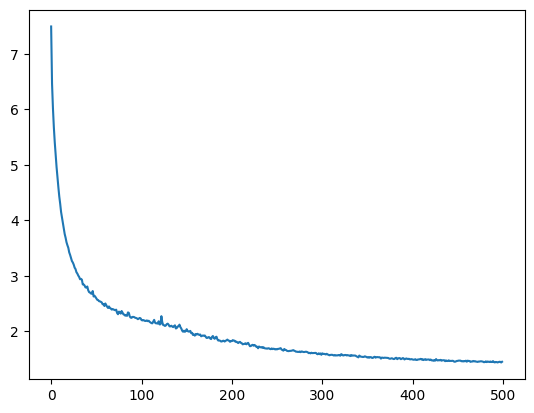

In [265]:
plt.plot(epoch_loss_avg)

In [266]:
input_data = []
for i in range(vocabulary_size):
    input_data.append(i)

In [267]:
input_data = torch.tensor(input_data)

In [268]:
import torch
import torch.nn as nn

# Assume you have a model called `my_model` with an embedding layer
embedding_layer = Transformer_Encoder.embedding  # Get the embedding layer

# Create a sample input data
#input_data = torch.tensor([1, 2, 3, 4, 5])  # example input data

# Pass the input data through the embedding layer
embeddings = embedding_layer(input_data.to(device))

# Now you have the embeddings for the input data
print(embeddings)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1000,  0.0346, -0.0903,  ...,  0.6154,  0.0627,  0.1346],
        [-0.2599, -1.0064, -0.5395,  ..., -1.6975,  3.1897, -0.3066],
        ...,
        [ 2.0522,  2.5415,  2.6027,  ...,  3.3586,  2.8190,  0.3066],
        [ 0.1582, -3.0285,  2.8577,  ...,  0.4387,  2.2840, -1.2822],
        [ 0.5899,  3.0560, -0.8975,  ...,  3.2716,  0.5727, -2.3476]],
       device='cuda:0', grad_fn=<EmbeddingBackward0>)


In [269]:
!pip install hdbscan

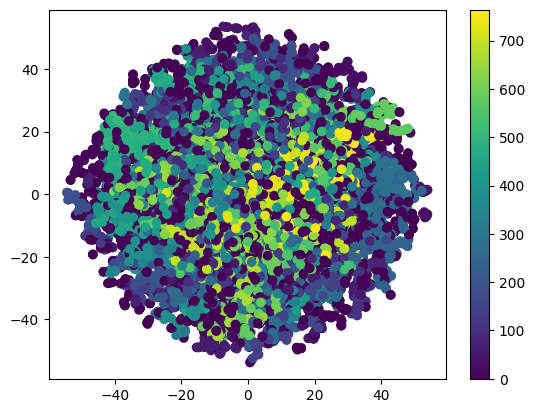

In [270]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan


embeddings = embeddings.cpu()
# Загрузка эмбеддингов слов
#embeddings = embeddings_np
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=3, perplexity=3)
embeddings_tsne = tsne.fit_transform(embeddings_np)



# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=6)
clusters = clusterer.fit_predict(embeddings_tsne)

# Визуализация результатов
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=clusters)
plt.colorbar()
plt.show()

In [271]:
# Получение меток классов
labels = clusterer.labels_

# Создание словаря для сопоставления слов и меток классов
word_clusters = dict(zip(vocabulary, labels))

In [272]:
word_clusters

{'[PAD]': 736,
 '[MASK]': 711,
 'NET CORE': -1,
 'DDD': 39,
 'CI': -1,
 'VKONTAKTE API': 445,
 'OFFICE': 591,
 'RPC API': 513,
 'REST API': 517,
 'SOLID': 458,
 'DRY': 89,
 'KISS': -1,
 'YAGNI': 333,
 'BDUP': 275,
 'DOCKER': 749,
 'KUBERNETES': 650,
 'HELM CHARTS': 736,
 'KAFKA': 730,
 'RABBIT MQ': 39,
 'AZURE SERVICE BUS': 658,
 'C ': 151,
 '1C БУХГАЛТЕРИЯ': 590,
 'ЭКОНОМИЧЕСКИЙ АНАЛИЗ': 611,
 'КРЕДИТОРСКАЯ ЗАДОЛЖЕННОСТЬ': -1,
 'ВНУТРЕННИЙ ФИНАНСОВЫЙ АУДИТ': 147,
 'БЮДЖЕТИРОВАНИЕ': 764,
 'ПОДГОТОВКА ОТЧЕТОВ': -1,
 'ФИНАНСОВЫЙ АНАЛИЗ': -1,
 'ФИНАНСОВЫЙ КОНТРОЛЬ': 737,
 'ДОЛГОСРОЧНОЕ БЮДЖЕТИРОВАНИЕ И ПЛАНИРОВАНИЕ': 296,
 'КРАТКОСРОЧНОЕ БЮДЖЕТИРОВАНИЕ И ПЛАНИРОВАНИЕ': 419,
 'РАБОТА С АВТОМОБИЛЯМИ В ЛИЗИНГЕ': 456,
 'ГАРАНТИЙНОЕ ОБСЛУЖИВАНИЕ': -1,
 'ФИНАНСОВОЕ ПЛАНИРОВАНИЕ': 553,
 'ФОРМИРОВАНИЕ БЮДЖЕТА': 456,
 'УПРАВЛЕНИЕ ЗАТРАТАМИ': 317,
 'ФИНАНСОВЫЙ МЕНЕДЖМЕНТ': 747,
 'УПРАВЛЕНЧЕСКИЙ УЧЕТ': 744,
 'БИЗНЕС ПЛАНИРОВАНИЕ': 317,
 'ФИНАНСОВОЕ МОДЕЛИРОВАНИЕ': 465,
 '1C ФИНАНСЫ': -1,
 'АНАЛИЗ ТЕ

In [273]:
# Создание DataFrame из словаря
df = pd.DataFrame(list(word_clusters.items()), columns=['Слово', 'Метка'])

# Запись DataFrame в Excel
df.to_excel('/content/word_clusters.xlsx', index=False)

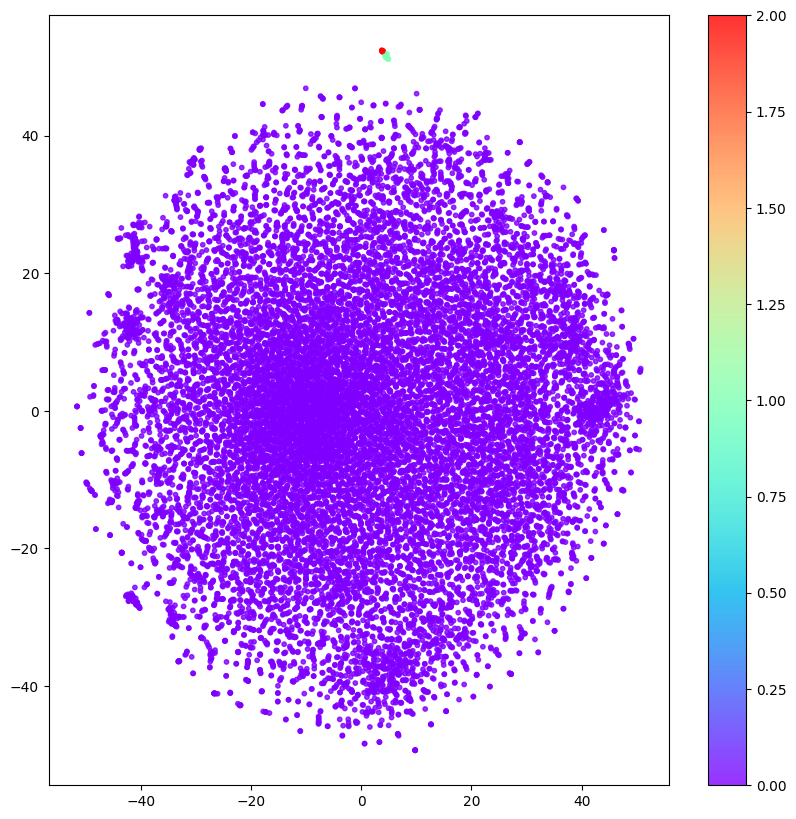

In [274]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan

embeddings = embeddings.cpu()
# Преобразование тензора embeddings в массив numpy
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
embeddings_tsne = tsne.fit_transform(embeddings_np)

# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=7)
clusters = clusterer.fit_predict(embeddings_tsne)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_tsne = embeddings_tsne[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(10, 10))
plt.scatter(filtered_embeddings_tsne[:, 0], filtered_embeddings_tsne[:, 1], c=clusters[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()